# 事例演習　:　ファイル入力

### 複数のファイルの一括読み込み
- 指定した directory (フォルダ)　の中のファイルをまとめて読み込む
- 事例　:　"images" directory　内の全ての画像を読み込んで表示する

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os     # python処理系に標準に装備されているライブラリ/オペレーティングシステム関連の機能提供

## directory下のファイルの一括読み込み

In [4]:
dname = '../OpenCV/images'       # directory名
fnames = os.listdir(path=dname)  # directory内の一覧(list)
print(fnames)
print('個数:', len(fnames))

['14.jpg', '15.jpg', '01.jpg', '17.jpg', '03.jpg', '02.jpg', '16.jpg', '12.jpg', '06.jpg', '07.jpg', '13.jpg', '05.jpg', '11.jpg', '10.jpg', '04.jpg', '09.jpg', '08.jpg', '18.jpg', '.ipynb_checkpoints']
個数: 19


In [5]:
pname = os.path.join(dname, fnames[1])  # pathを合成
print(pname)

../OpenCV/images/15.jpg


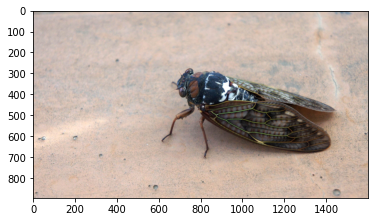

In [6]:
imBGR = cv2.imread(pname)
plt.imshow(imBGR[:, :, [2, 1, 0]])

### 機械学習や人工知能系ではよく使用する
- directory に入っている複数の data をいっぺんに読み込む。そして処理する

### directory内の全ファイルを読み込む
- directory名に各file name を次々と　join　してデータ集合(list)の形にして保持しておく

In [7]:
pnames = []  # pathのlistを初期化
for fn in fnames:
    pnames.append(os.path.join(dname, fn))  # path名を作成してlistに追加する
print(pnames)

['../OpenCV/images/14.jpg', '../OpenCV/images/15.jpg', '../OpenCV/images/01.jpg', '../OpenCV/images/17.jpg', '../OpenCV/images/03.jpg', '../OpenCV/images/02.jpg', '../OpenCV/images/16.jpg', '../OpenCV/images/12.jpg', '../OpenCV/images/06.jpg', '../OpenCV/images/07.jpg', '../OpenCV/images/13.jpg', '../OpenCV/images/05.jpg', '../OpenCV/images/11.jpg', '../OpenCV/images/10.jpg', '../OpenCV/images/04.jpg', '../OpenCV/images/09.jpg', '../OpenCV/images/08.jpg', '../OpenCV/images/18.jpg', '../OpenCV/images/.ipynb_checkpoints']


### 実際の機械学習やデータ処理では上記のような記述はしない
- もっと短く簡略する記述がある
- listの内包表現

In [8]:
# list内包表記で１行で済む
pnames = [os.path.join(dname, fn) for fn in fnames]
print(pnames)

['../OpenCV/images/14.jpg', '../OpenCV/images/15.jpg', '../OpenCV/images/01.jpg', '../OpenCV/images/17.jpg', '../OpenCV/images/03.jpg', '../OpenCV/images/02.jpg', '../OpenCV/images/16.jpg', '../OpenCV/images/12.jpg', '../OpenCV/images/06.jpg', '../OpenCV/images/07.jpg', '../OpenCV/images/13.jpg', '../OpenCV/images/05.jpg', '../OpenCV/images/11.jpg', '../OpenCV/images/10.jpg', '../OpenCV/images/04.jpg', '../OpenCV/images/09.jpg', '../OpenCV/images/08.jpg', '../OpenCV/images/18.jpg', '../OpenCV/images/.ipynb_checkpoints']


### 全画像の読み込み
- list内包表記を使用して記述する
    - *pnames* から 1個づつ取り出して *p* に受け取り、その　*path名* を *imread* を使用して読み込む

In [9]:
imgs = [cv2.imread(p) for p in pnames]  # 全ての画像配列のlist

### 全画像を表示
- <u>plt.show()</u>
    - 連続表示・連続的に *imshow()* をする場合は、　*imshow()* を実行するごとに *show()* 関数を使用して、一旦ここで表示という指示を行う
    - そうする事によって、各dataが別の作図面とみなされて別々に表示される

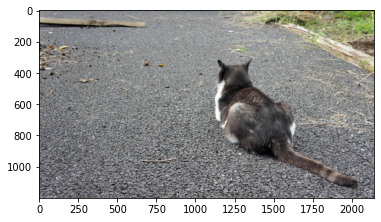

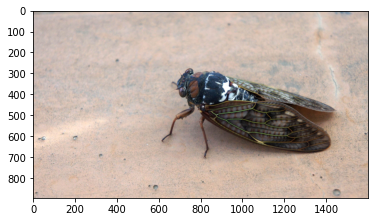

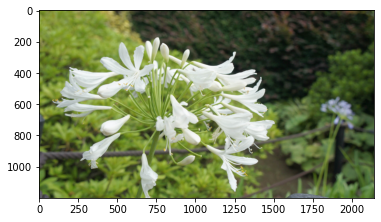

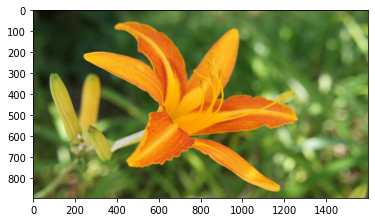

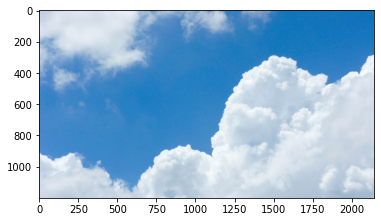

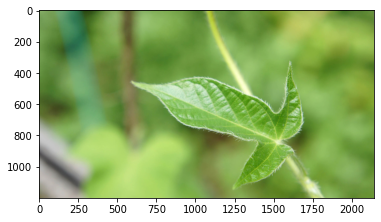

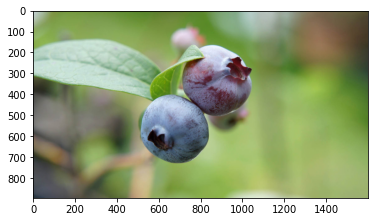

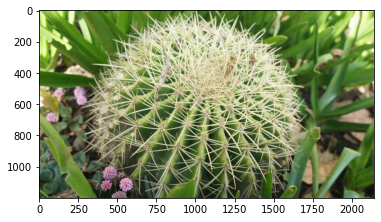

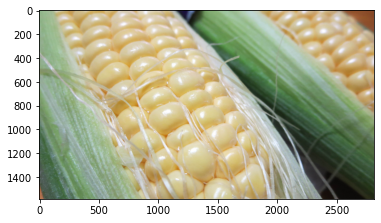

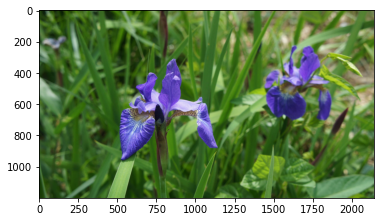

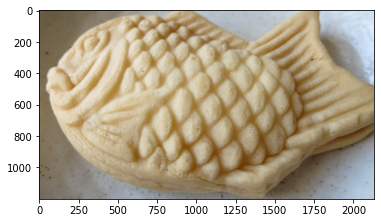

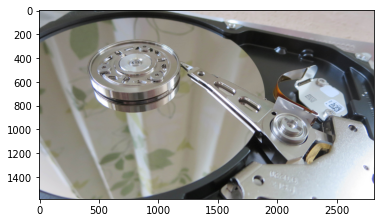

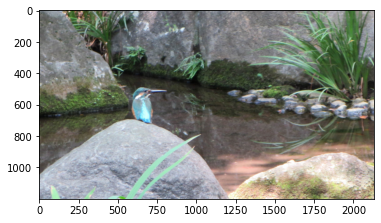

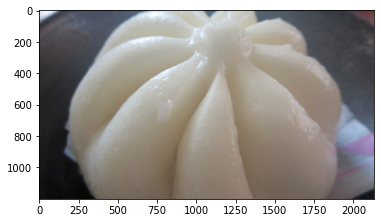

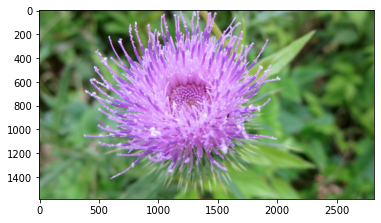

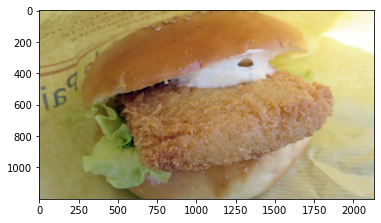

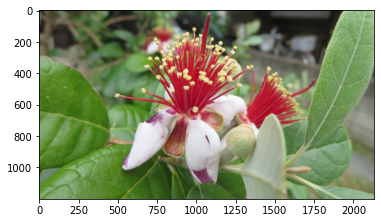

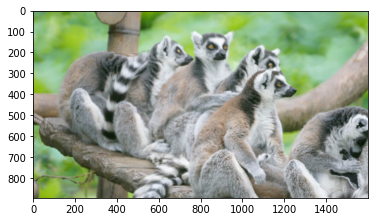

In [10]:
for img in imgs[:18]:
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.show()                      # 1個1個の画像を区切るための関数: .show()をつけないと同じ所に１８の画像が表示されて最後の画像しか表示されなくなってしまう

## 複数ファイルを一括読込み
- <u>考え方</u>:
    - 1)　対象ファイルの path の集合を作る
        - ファイルの名前として扱うよりも、それを入れている　directory　に名前を付けて、file名を指定する。
        - 上記が　*path*　という考え方　->　**有りかとfile名を連結して** *path* という考え方になる
        - path名などだけで集合を　list　で作成しておく　->　よく使用される方法
    - 2)　上記の path 集合の個々の要素を元にして読み込む
        - for 文などによる繰り返しや、　list 内包表記を応用する
        - 個々のfileから読み込んだ内容の集合をつくる(listなどで表現)

## まとめ
- <u>ある directory内の全ての項目(ファイルやフォルダ)のlistを取得</u>
    - **os.listdir(path=ディレクトリ名)**　:　項目が list 構造で得られる


- <u>directory の概念に基づく 「 path 」</u>
    - **単なる　「 file名 」　に限らず、格納まで含んだ一般的なデータの指定方法**
    - 「 directory名 」　と　「 file名 」　から　「 path 」 を構成する方法
        - **os.pathjoin( directory名, file名 )**


- <u>list内包表記</u>
    - 機械学習や人工知能、ビックデータで非常に活用される
    - data列から別のdata列を作る方法　->　python独自の方法(大技)　->　*できるだけ内包表記でできないか考えると良い*
    - **[　新たな要素を構成する式　for　要素　in　元のデータ列　]**
        - list から別の list　を生成する
        - *機械学習・人工知能では必須の基礎技術*
        - 簡潔に記述でき分かりやすく、場合によっては処理自体の実行時間も抑えられる

# 事例演習　:　画像の表示

### 多量の画像を効率的に表示する方法
- <u>機械学習や人工知能に関するプログラムにおいて重要</u>
    - 学習用の画像データの一覧表示
    - 物体認識の結果の一覧表示
    - その他

### 複数の画像をまとめて表示

In [ ]:
(fig, ax) = plt.subplots(3, 6, figsize=(12, 4))
n = 0
for a in ax.ravel():
    a.imshow(imgs[n][:, :, [2, 1, 0]])
    a.set_xticks(ticks=[])  # 横軸のメモリを消す
    a.set_yticks(ticks=[])  # 縦軸のメモリを消す
    n += 1

### 上記の解説
1. ax　->　二次元の形で1個1個プロットされる
2. そのままでは扱いづらいので、 **ravel()** methodで一直線(一次元配列)にしてしまう
3. for分の扱える data　構造になるので、順番に描画処理ができる

### 上記のような数値列で無いような繰り返し構造の為の count up 機能がある
- for a in ax.ravel()：　今回のようなfor文（images）

#### enumerate( )関数を使用する
- 繰り返し制御の時に現在何番目という事（番号を取得したい）がある
- enumerate( )関数は index も返してくれる

In [ ]:
# 更に簡単な記述
(fig, ax) = plt.subplots(3, 6, figsize=(12, 4))
for (n, a) in enumerate(ax.ravel()):
    a.imshow(imgs[n][:, :, [2, 1, 0]])
    a.set_xticks(ticks=[])  # 横軸のメモリを消す
    a.set_yticks(ticks=[])  # 縦軸のメモリを消す

## まとめ
- <u>縦横に画像を描画する為の準備</u>
    - **(fig, ax) = plt.subplots( 行数, 列数, figsize=(横幅, 高さ) )**
    - **行数 x 高さ**　の描画領域が２次元配列 *ax* に得られる


- <u>描画方法1</u>:
    - **ax = [ 行index ][ 列index ].imshow(画像配列)**



- **<u>描画方法２</u>**
    - 2次元配列 *ax* を１次元に展開したものに対して順番に描画
    - **ax.ravel()**　で一次元に展開する
        - for文に使用できるようになる

# 事例演習　:　ファイル出力

### 複数の画像データをまとめて保存する
- 複数のカラー画像をそれぞれグレースケールに変換して、まとめてファイルに保存する

### 複数の画像をまとめて変換

In [13]:
# 全ての画像をグレースケールに変換する
imgsGr = []  # 画像のlistの初期化
for im in imgs[:18]:
    imGr = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    imgsGr.append(imGr)

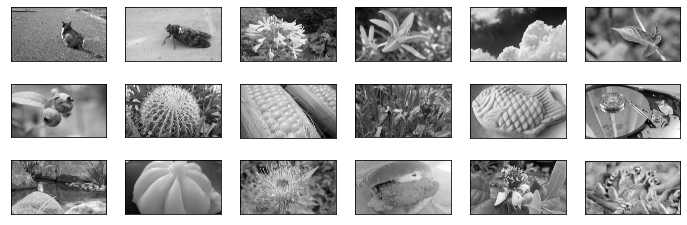

In [14]:
# 更に簡単な記述
(fig, ax) = plt.subplots(3, 6, figsize=(12, 4))
for (n, a) in enumerate(ax.ravel()):
    a.imshow(imgsGr[n], cmap=plt.cm.gray)     # グレースケールなのでチャンネルを反転する処理はいらない
    a.set_xticks(ticks=[])                    # 横軸のメモリを消す
    a.set_yticks(ticks=[])                    # 縦軸のメモリを消す

### 更に簡単な方法
- list内包表記を使用してもっと簡単に処理する

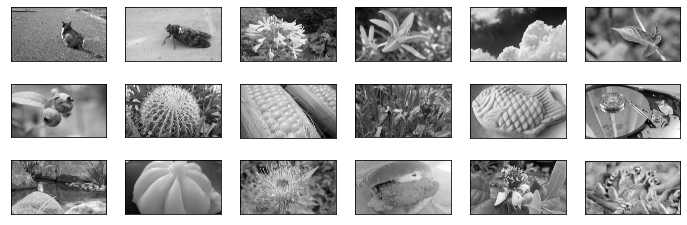

In [15]:
imgsGr = [cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) for im in imgs[:18]]
# 更に簡単な記述
(fig, ax) = plt.subplots(3, 6, figsize=(12, 4))
for (n, a) in enumerate(ax.ravel()):
    a.imshow(imgsGr[n], cmap=plt.cm.gray)     # グレースケールなのでチャンネルを反転する処理はいらない
    a.set_xticks(ticks=[])                    # 横軸のメモリを消す
    a.set_yticks(ticks=[])                    # 縦軸のメモリを消す

### 複数のファイルをまとめてファイルに出力

In [16]:
for (n, im) in enumerate(imgsGr):
    fn = str(n+1) + '_gr.jpg'
    p = os.path.join(dname, fn)                         # directory　の後ろに fn を連結して path名にして p として受け取る
    cv2.imwrite(p, im, [cv2.IMWRITE_JPEG_QUALITY, 60])  # .jpg は画像を保存する時の品質(画質)を指定する事ができる : 容量を小さくするか？画質を取るか決めることができる

## まとめ
- <u>複数のファイルへの出力の考え方</u>
    - ファイル名, pathを合成し, それに対して for分などを使用して順次出力する
    - 出力処理をfor文などで繰り返す
        - 出力に関しては内包表記にする必要はない

# 事例演習　:　ファイルの選択

### ファイル名のパターンによる選択的な読み込み
- path(file, directory)を扱うためのライブラリ
    - 1. os module
    - 2. **pathlib module**
        - python　に標準添付されているモノ


- file名の末尾が　*_gr.jpg* であるファイルを選択して読み込む

### ファイルの選択読み込み

In [17]:
from pathlib import Path  # pathを扱うための進んだ機能

In [18]:
p = Path(dname)
print(p)

../OpenCV/images


In [19]:
type(p)

pathlib.PosixPath

- pathlib.PosixPath の型にしておくと色々と便利な機能を使用できる

In [25]:
plist = p.glob('*_gr.jpg')  # *(アスタリスク)は任意の文字列　：　なんでも良い文字列 / ただしその後ろの記述は指定
print(plist)

<generator object Path.glob at 0x1279ea9e0>


- generator(ジェネレーター)　:　繰り返し制御などで使用できる、特殊な data 列

In [26]:
# 上記だと分かりづらいので list構造に変換する
plist = list(p.glob('*_gr.jpg'))
print(plist)

[PosixPath('../OpenCV/images/5_gr.jpg'), PosixPath('../OpenCV/images/9_gr.jpg'), PosixPath('../OpenCV/images/10_gr.jpg'), PosixPath('../OpenCV/images/12_gr.jpg'), PosixPath('../OpenCV/images/7_gr.jpg'), PosixPath('../OpenCV/images/16_gr.jpg'), PosixPath('../OpenCV/images/3_gr.jpg'), PosixPath('../OpenCV/images/1_gr.jpg'), PosixPath('../OpenCV/images/14_gr.jpg'), PosixPath('../OpenCV/images/18_gr.jpg'), PosixPath('../OpenCV/images/11_gr.jpg'), PosixPath('../OpenCV/images/4_gr.jpg'), PosixPath('../OpenCV/images/8_gr.jpg'), PosixPath('../OpenCV/images/6_gr.jpg'), PosixPath('../OpenCV/images/13_gr.jpg'), PosixPath('../OpenCV/images/2_gr.jpg'), PosixPath('../OpenCV/images/17_gr.jpg'), PosixPath('../OpenCV/images/15_gr.jpg')]


### グレースケールの画像のみを読み込む

In [27]:
imgs2 = [cv2.imread(str(im), cv2.IMREAD_GRAYSCALE) for im in plist]

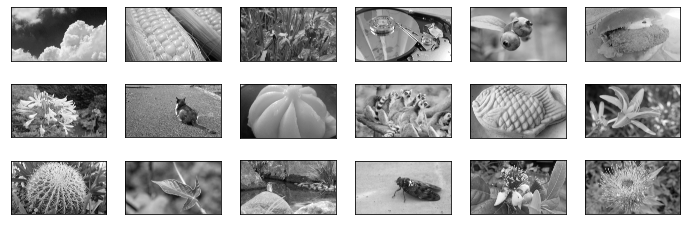

In [28]:
(fig, ax) = plt.subplots(3, 6, figsize=(12, 4))
for (n, a) in enumerate(ax.ravel()):
    a.imshow(imgs2[n], cmap=plt.cm.gray)
    a.set_xticks(ticks=[])
    a.set_yticks(ticks=[])

- 選択的に読み込んで、抜き出して読み込んだ場合は順番は変わってしまう

- 先頭に 0 があるかないかで、順番が少し変わってしまう

- 3行・6列で表示されている

In [30]:
plist = list(p.glob('?_gr.jpg'))  # ?(クエスチョンマーク)任意の１文字　 : １桁の部分が対象になる 1 ~ 9
print(plist)

[PosixPath('../OpenCV/images/5_gr.jpg'), PosixPath('../OpenCV/images/9_gr.jpg'), PosixPath('../OpenCV/images/7_gr.jpg'), PosixPath('../OpenCV/images/3_gr.jpg'), PosixPath('../OpenCV/images/1_gr.jpg'), PosixPath('../OpenCV/images/4_gr.jpg'), PosixPath('../OpenCV/images/8_gr.jpg'), PosixPath('../OpenCV/images/6_gr.jpg'), PosixPath('../OpenCV/images/2_gr.jpg')]


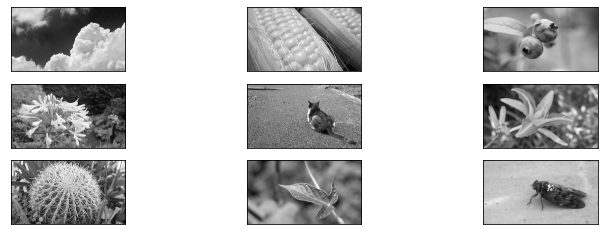

In [31]:
imgs2 = [cv2.imread(str(im), cv2.IMREAD_GRAYSCALE) for im in plist]
(fig, ax) = plt.subplots(3, 3, figsize=(12, 4))
for (n, a) in enumerate(ax.ravel()):
    a.imshow(imgs2[n], cmap=plt.cm.gray)
    a.set_xticks(ticks=[])
    a.set_yticks(ticks=[])

- 数字１桁で始まるグレースケールの画像が抽出される

## まとめ
- <u>pathとfileを扱う高度な機能</u>　:　pathlib
    - *from pathlib import **Path***　で API を読み込む
    - Path　object として path を扱う
        - **p = Path(パスの文字列)**
        - p に path を意味する object が得られる
        - *path object という data type*


- <u>list(**p.glob( ファイル名のパターン )**)　で対象ファイルのlistが得られる</u>
    - list関数で変換しなければ*generator形式*　:　list形式の方が汎用性が有り安全(扱いやすい)
    - 「 file名のパターン 」　には　「 * 」　「 ? 」　が使用できる
        - *　任意の(長さ)文字列
        - ?　任意の１文字